# Video Games Sales Prediction

`Author:` [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)\
`Date:` 23-Sept-2024\
[Send me an email](mailto:mohammadebad1@hotmail.com)\
[Visit my GitHub profile](https://github.com/smebad)

[Dataset used in this notebook](https://www.kaggle.com/datasets/gregorut/videogamesales)

## Introduction
This notebook aims to predict global video game sales using the dataset provided on Kaggle. The dataset includes features like sales in different regions, game rank, and other relevant data, which will be used to build a predictive model.

In this notebook, we'll follow these steps:

1. Load and explore the dataset
2. Handle missing values
3. Perform exploratory data analysis (EDA)
4. Build and evaluate a predictive model using Linear Regression
5. Summarize the findings


### 1. Importing Necessary Libraries

In [47]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Loading and Exploring the Dataset

In [52]:
# loading the dataset
df = pd.read_csv('vgsales.csv')
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Dataset Overview
The dataset contains information about video games released across various platforms, with attributes like Rank, Name, Platform, and sales in different regions (NA_Sales, EU_Sales, JP_Sales, etc.).



### 3. Handling Missing Values
Let's identify and handle any missing values in the dataset.

In [6]:
# checking out the null values
print(df.isna().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
# dropping of the null values
df.dropna(inplace=True)
print(df.isna().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


### 4. Exploratory Data Analysis (EDA)
### 4.1 Top Games Based on Global Sales

In [11]:
# Checking out the top games based on sales
top_games = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print(top_games)

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Name: Global_Sales, dtype: float64


### 4.2 Plotting the Top Games

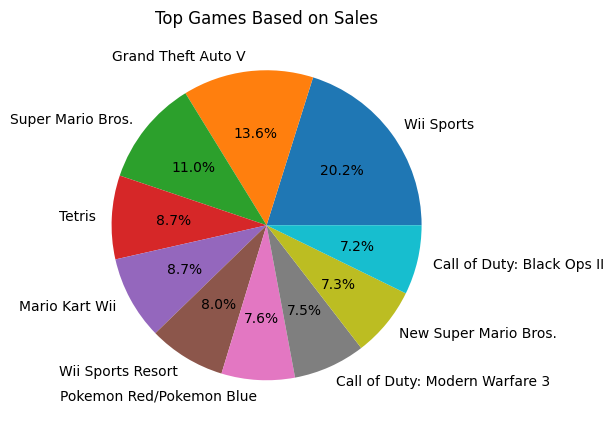

In [17]:
# plotting the data of the top games in pie chart
plt.figure(figsize=(5, 8))
plt.pie(top_games, labels=top_games.index, autopct='%1.1f%%')
plt.title('Top Games Based on Sales')
plt.show()


### 4.3 Correlation Between Numeric Features
Let's check how different numeric features of the dataset correlate with each other.

In [23]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

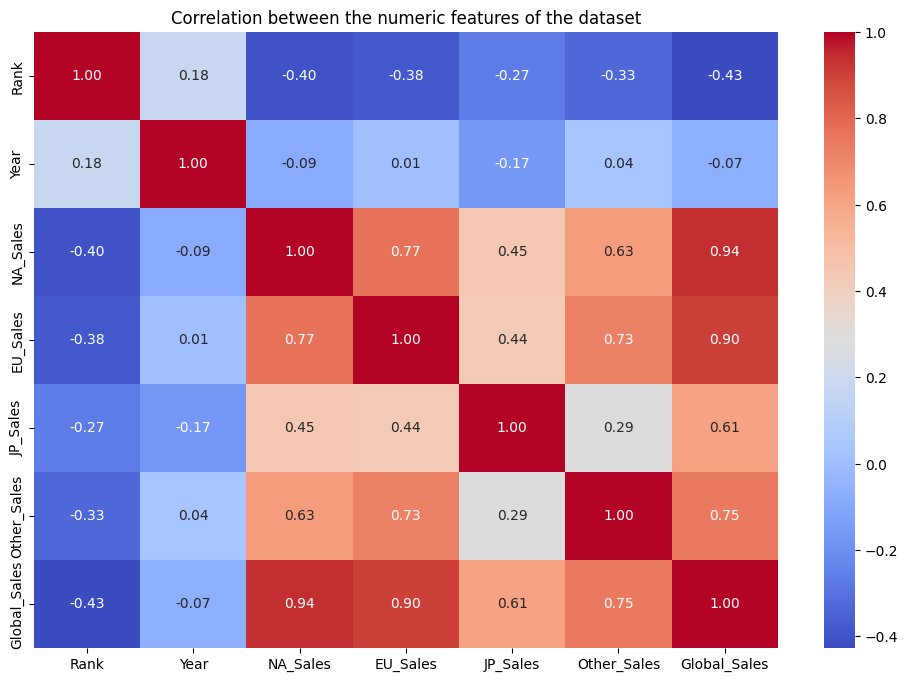

In [41]:
# Lets check out the correlation between the features of the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation between the numeric features of the dataset')
plt.show()


### 5. Predicting Global Sales Using Linear Regression
#### Why Linear Regression?

We use Linear Regression because it is a simple yet effective algorithm for predicting a continuous target variable (in this case, Global_Sales). It assumes a linear relationship between the features (like NA_Sales, EU_Sales, JP_Sales, etc.) and the target variable, which is appropriate for this problem.

### 5.1 Preparing the Data
We'll select relevant features and split the data into training and testing sets.

In [39]:
# Defining features (independent variables) and target (dependent variable)
x = df[['Rank','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

In [45]:
# Splitting the dataset into train and test
xtest, xtrain, ytest, ytrain = train_test_split(x,y, test_size=0.2, random_state=42)

### 5.2 Training the Linear Regression Model

In [46]:
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(xtrain, ytrain)

# Making predictions
prediction = model.predict(xtest)

### 5.3 Evaluating the Model
We evaluate the model using the Mean Squared Error (MSE) and the R-squared (R²) score, which help measure the accuracy of the model.

In [49]:
# Evaluating the model performance
mse = mean_squared_error(ytest, prediction)
r2 = r2_score(ytest, prediction)

# Displaying the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2.691542585566583e-05
R-squared (R²): 0.9999865466885092


### 5.4 Visualizing Actual vs Predicted Sales

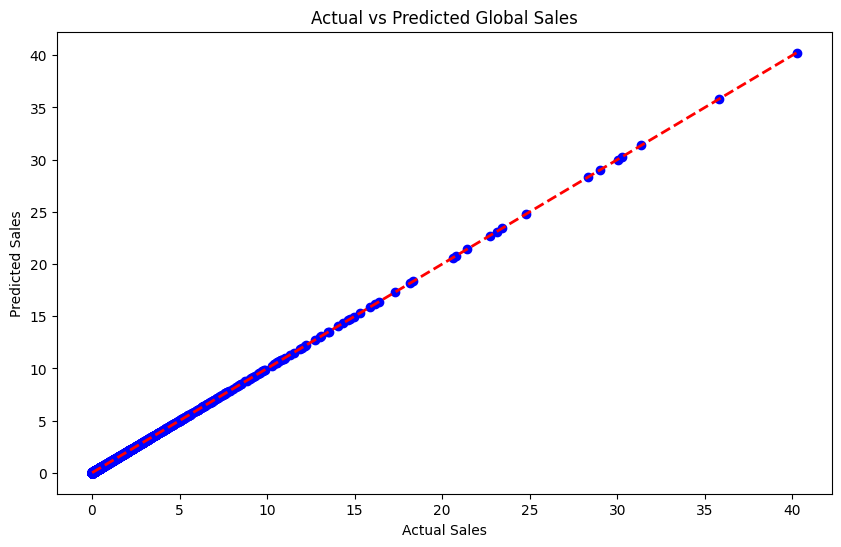

In [50]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ytest, prediction, color='blue')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Global Sales')
plt.show()

## 6. Conclusion
In this notebook, we explored the Video Games Sales dataset and used Linear Regression to predict global sales. The linear regression model was trained on features like sales from different regions and was evaluated using metrics like MSE and R-squared.

### Key Insights:
* We successfully built a linear regression model that could predict global sales based on the available features.
* The R-squared score indicates how well the model's predictions match the actual data. A higher R² means better accuracy.
* The model's performance could be further improved by feature engineering or using more complex algorithms.
